In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

In [2]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

In [3]:
dados = pd.read_csv('airline_passengers.csv', header=0)
dados['Month'] = pd.to_datetime(dados['Month'])
dados.set_index('Month', drop=True, inplace=True)

In [4]:
dados

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


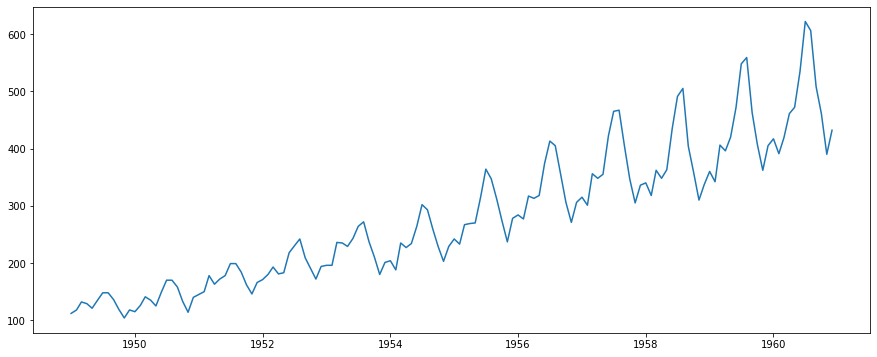

In [5]:
plt.plot(dados)
plt.show()

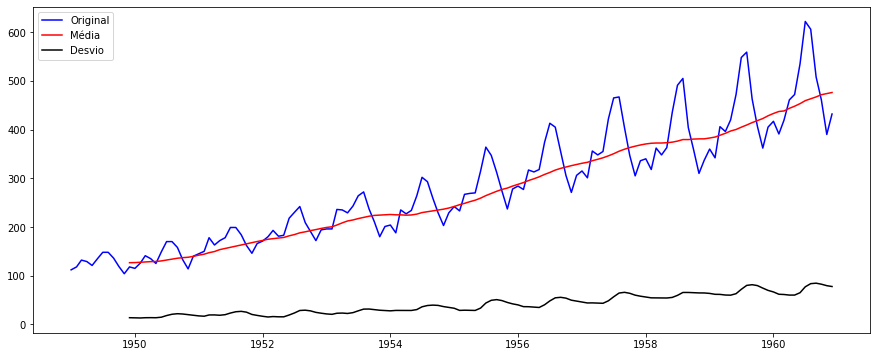

In [6]:
m_m = dados.rolling(window=12).mean()
m_std = dados.rolling(window=12).std()

orig = plt.plot(dados, color='blue',label='Original')
mean = plt.plot(m_m, color='red',label='Média')
std = plt.plot(m_std, color='black',label='Desvio')
plt.legend(loc='best')
plt.show()

### Estimativa e Eliminação da Tendência 

#### Média móveis

In [7]:
k = 12 # média de k 
media_mov = dados.rolling(k).mean()  

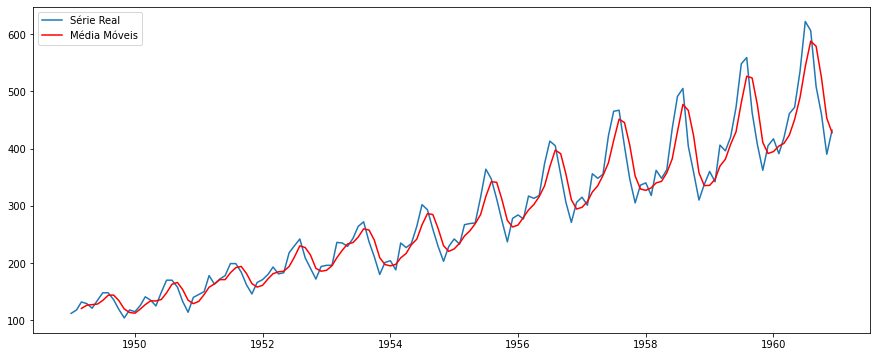

In [8]:
rolling = dados.rolling(window=3)
rolling_mean = rolling.mean()
# plot original and transformed dataset
plt.plot(dados, label='Série Real')
plt.plot(rolling_mean,color='red', label='Média Móveis')
plt.legend(loc='best')
plt.show()

### Suavização Exponencial 

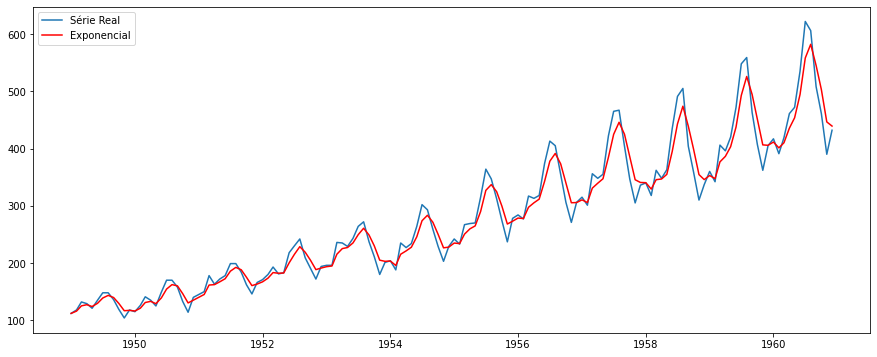

In [9]:
rolling =  dados.ewm(alpha = 0.5)
rolling_mean = rolling.mean()
plt.plot(dados, label='Série Real')
plt.plot(rolling_mean,color='red', label='Exponencial')
plt.legend(loc='best')
plt.show()

In [10]:
rolling = dados.interpolate(method = 'polynomial', order=10)

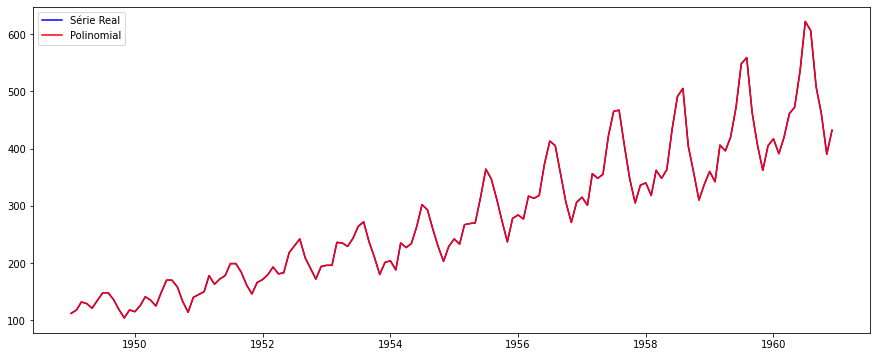

In [11]:
plt.plot(dados,color='blue', label='Série Real')
plt.plot(rolling,color='red', label='Polinomial')
plt.legend(loc='best')
plt.show()

### Eliminando a tendência

In [12]:
dados_sazonalidade_ruido = dados - rolling_mean  # Série - componente de tendência

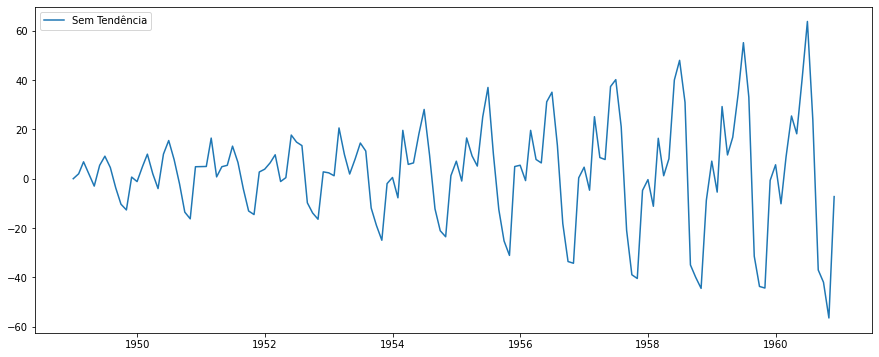

In [13]:
plt.plot(dados_sazonalidade_ruido, label='Sem Tendência')
plt.legend(loc='best')
plt.show()

### Eliminação de Tendência por Diferenciação

In [14]:
dados

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [15]:
dados.shift()

,Passengers
Month,
1949-01-01,NaN
1949-02-01,112.0
1949-03-01,118.0
1949-04-01,132.0
1949-05-01,129.0
...,...
1960-08-01,622.0
1960-09-01,606.0
1960-10-01,508.0


In [17]:
dados_diff = dados - dados.shift()  #Subtrai a série por ela mesma com um retardo -1

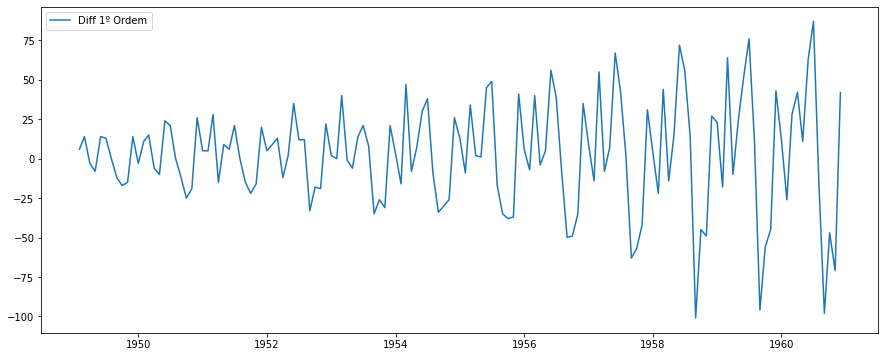

In [18]:
plt.plot(dados_diff, label='Diff 1º Ordem')
plt.legend(loc='best')
plt.show()

In [19]:
dados_diff_2 = dados_diff - dados_diff.shift()

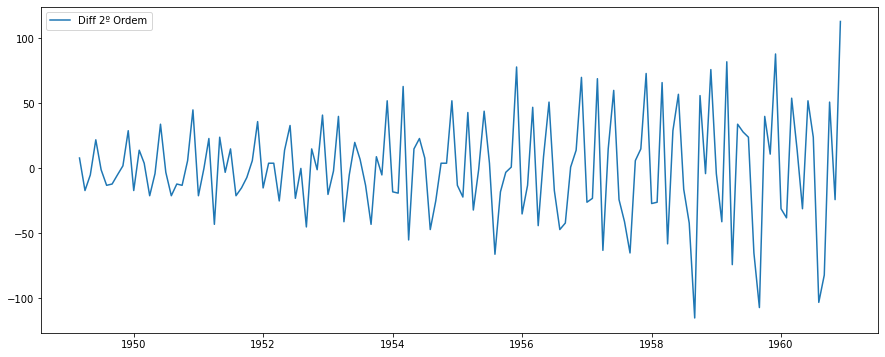

In [20]:
plt.plot(dados_diff_2, label='Diff 2º Ordem')
plt.legend(loc='best')
plt.show()

### Estimação e Eliminação da Sazonalidade

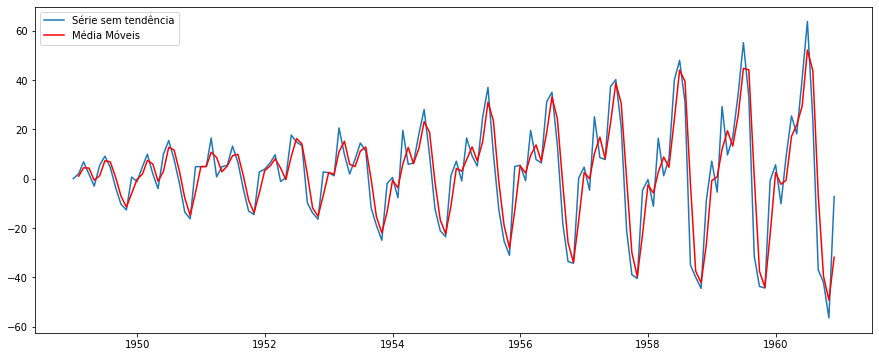

In [21]:
#Aplica média móveis na série sem a tendência 
dados_sazonalidade_ruido

rolling = dados_sazonalidade_ruido.rolling(window=2)
rolling_mean = rolling.mean()
# plot original and transformed dataset
plt.plot(dados_sazonalidade_ruido, label='Série sem tendência')
plt.plot(rolling_mean,color='red', label='Média Móveis')
plt.legend(loc='best')
plt.show()

In [22]:
dados_ruido = dados_sazonalidade_ruido - rolling_mean #Elimina o componente de sazonalidade 

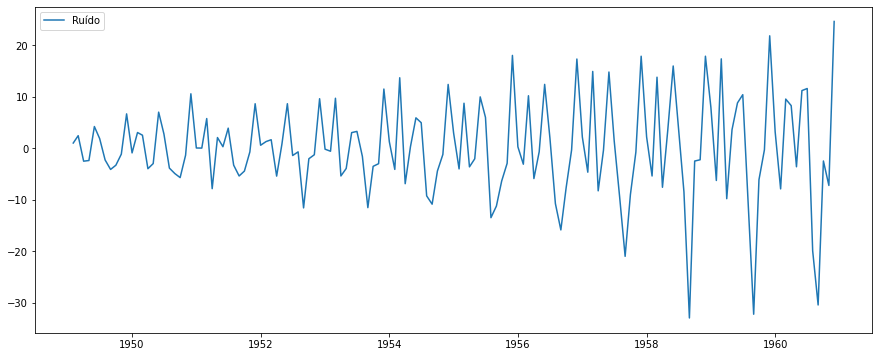

In [23]:
plt.plot(dados_ruido, label='Ruído')
plt.legend(loc='best')
plt.show()

### Avaliar o resíduo 

In [24]:
import statsmodels.tsa.api as smt

/home/rcp/Documents/GIS-project/gis-env/lib/python3.8/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


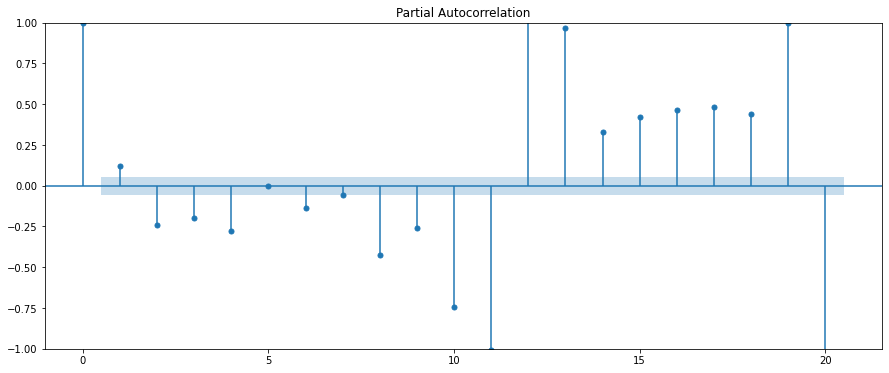

In [25]:
dados_ruido.dropna(inplace=True) # retira os NaN
smt.graphics.plot_pacf(dados_ruido, lags=20, alpha=0.5)
plt.show()

* __É possível observar que ainda existem lags que estão com correlação estatisticamente significante, ou seja, o residuo ainda não pode ser considerado I.I.D. Por conta disso, os modelos de tendência e sazonalidade precisam ser reajustados__ 

### Decomposição da série de forma automática 

In [26]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [27]:
#é preciso criar uma frequencia na série para usar a função de decomposição 
rng = pd.date_range('1949 Jan 1', periods = len(dados), freq = 'M')

In [28]:
dados_date = pd.Series(dados['Passengers'].values, index = rng)

In [29]:
decomp = seasonal_decompose(dados_date)

In [30]:
tendencia = decomp.trend
sazonalidade = decomp.seasonal
residuo = decomp.resid

In [31]:
residuo

1949-01-31   NaN
1949-02-28   NaN
1949-03-31   NaN
1949-04-30   NaN
1949-05-31   NaN
              ..
1960-08-31   NaN
1960-09-30   NaN
1960-10-31   NaN
1960-11-30   NaN
1960-12-31   NaN
Freq: M, Name: resid, Length: 144, dtype: float64

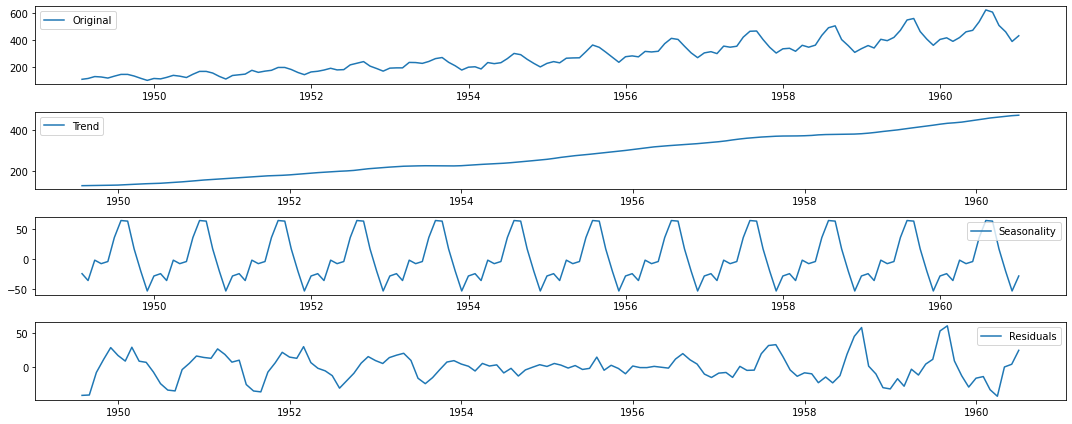

In [32]:
plt.subplot(411)
plt.plot(dados_date, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(tendencia, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(sazonalidade,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residuo, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()